# Обработка данных для машинного обучения

### Задания для выполнения
1) На сайте https://www.kaggle.com/datasets выбрать набор данных каждому студенту индивидуально. Лучше всего выбирать датасеты в предметной области исходя из личных предпочтений. Не стоит выбирать слишком большие наборы данных (лучше не более 100 Мб).

2) В начале анализа следует привести общую характеристику набора данных: количество наблюдений, признаков, предметная область, содержание признаков, характер целевой переменной, задача обучения (регрессия, классификация, количество классов).

3) Провести в Jupyter средствами pandas, sklearn, seaborn описательный анализ выбранного набора включающего (но не ограниченного) следующие шаги:

    - исследование шкалы измерения каждого существенного признака;
    
    - построение эмпирического распределения каждого существенного признака;

    - анализ количества и распределения отсутствующих значений;

    - построение совместного распределения каждого признака и целевой переменной;

    - построение корреляционной матрицы.

4) По каждому пункту анализа необходимо сделать содержательный вывод.

5) Провести подготовительную обработку данных, включающую следующие шаги: 6. удаление или заполнение отсутствующих значений; 7. приведение всех признаков к бинарной либо числовой шкале; 8. удаление несущественных либо избыточных признаков; 9. другие необходимые действия в зависимости от набора данных и задачи (группировка, удаление аномалий, и др.).

6) Количественные характеристики датасета необходимо также привести после его обработки.

### прогнозирования стоимости автомобиля
https://www.kaggle.com/datasets/joanpau/cars-df

In this data set you can find +400 vehicles including some values such:

type of car (sport, suv, wagon, minivan, pickup …)

horse power

number of cylinders

type of traction system (RWD or 4x4, if not is FWD)

dealer_cost

mpg

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 семестр. Машинное обучение/data/Cars.csv')
df

,name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
0,Chevrolet Aveo 4dr,False,False,False,False,False,False,False,11690,10965,1.6,4,103,28.0,34.0,2370.0,98.0,167.0,66.0
1,Chevrolet Aveo LS 4dr hatch,False,False,False,False,False,False,False,12585,11802,1.6,4,103,28.0,34.0,2348.0,98.0,153.0,66.0
2,Chevrolet Cavalier 2dr,False,False,False,False,False,False,False,14610,13697,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0
3,Chevrolet Cavalier 4dr,False,False,False,False,False,False,False,14810,13884,2.2,4,140,26.0,37.0,2676.0,104.0,183.0,68.0
4,Chevrolet Cavalier LS 2dr,False,False,False,False,False,False,False,16385,15357,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Nissan Titan King Cab XE,False,False,False,False,True,True,False,26650,24926,5.6,8,305,14.0,18.0,5287.0,140.0,NaN,NaN
424,Subaru Baja,False,False,False,False,True,True,False,24520,22304,2.5,4,165,21.0,28.0,3485.0,104.0,NaN,NaN
425,Toyota Tacoma,False,False,False,False,True,False,True,12800,11879,2.4,4,142,22.0,27.0,2750.0,103.0,NaN,NaN
426,Toyota Tundra Regular Cab V6,False,False,False,False,True,False,True,16495,14978,3.4,6,190,16.0,20.0,3925.0,128.0,NaN,NaN


### Задача обучения: прогнозирования стоимости автомобиля (msrp). Наличие или отсутствие зависит от характеристик автомобиля
### Получаем задачу обучения - регрессия.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         428 non-null    object 
 1   sports_car   428 non-null    bool   
 2   suv          428 non-null    bool   
 3   wagon        428 non-null    bool   
 4   minivan      428 non-null    bool   
 5   pickup       428 non-null    bool   
 6   all_wheel    428 non-null    bool   
 7   rear_wheel   428 non-null    bool   
 8   msrp         428 non-null    int64  
 9   dealer_cost  428 non-null    int64  
 10  eng_size     428 non-null    float64
 11  ncyl         428 non-null    int64  
 12  horsepwr     428 non-null    int64  
 13  city_mpg     414 non-null    float64
 14  hwy_mpg      414 non-null    float64
 15  weight       426 non-null    float64
 16  wheel_base   426 non-null    float64
 17  length       402 non-null    float64
 18  width        400 non-null    float64
dtypes: bool(

In [5]:
df.describe()

,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
count,428.000000,428.000000,428.000000,428.000000,428.000000,414.000000,414.000000,426.000000,426.000000,402.000000,400.000000
mean,32774.855140,30014.700935,3.196729,5.775701,215.885514,20.089372,26.905797,3577.213615,108.173709,185.126866,71.292500
std,19431.716674,17642.117750,1.108595,1.622779,71.836032,5.213062,5.696804,760.437663,8.326449,13.312523,3.393484
min,10280.000000,9875.000000,1.300000,-1.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000,64.000000
25%,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3102.000000,103.000000,177.000000,69.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,186.000000,71.000000
75%,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.000000,29.000000,3974.250000,112.000000,193.000000,73.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,227.000000,81.000000


In [6]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        return mis_val_table_ren_columns

In [7]:
missing_values_table(df)

,Missing Values,% of Total Values
width,28,6.5
length,26,6.1
city_mpg,14,3.3
hwy_mpg,14,3.3
weight,2,0.5
wheel_base,2,0.5


#### Провести в Jupyter средствами pandas, sklearn, seaborn описательный анализ выбранного набора включающего (но не ограниченного) следующие шаги:

    - исследование шкалы измерения каждого существенного признака;
    
    - построение эмпирического распределения каждого существенного признака;

    - анализ количества и распределения отсутствующих значений;

    - построение совместного распределения каждого признака и целевой переменной;

    - построение корреляционной матрицы.

In [8]:
df.nunique()

name           425
sports_car       2
suv              2
wagon            2
minivan          2
pickup           2
all_wheel        2
rear_wheel       2
msrp           410
dealer_cost    425
eng_size        43
ncyl             8
horsepwr       110
city_mpg        28
hwy_mpg         32
weight         347
wheel_base      40
length          61
width           18
dtype: int64

In [9]:
df.apply(lambda col: col.unique())

name           [Chevrolet Aveo 4dr, Chevrolet Aveo LS 4dr hat...
sports_car                                         [False, True]
suv                                                [False, True]
wagon                                              [False, True]
minivan                                            [False, True]
pickup                                             [False, True]
all_wheel                                          [False, True]
rear_wheel                                         [False, True]
msrp           [11690, 12585, 14610, 14810, 16385, 13670, 150...
dealer_cost    [10965, 11802, 13697, 13884, 15357, 12849, 140...
eng_size       [1.6, 2.2, 2.0, 1.7, 2.4, 1.8, 1.5, 2.3, 3.1, ...
ncyl                                 [4, 6, 3, 8, 5, 12, 10, -1]
horsepwr       [103, 140, 132, 130, 110, 115, 117, 138, 104, ...
city_mpg       [28.0, 26.0, 29.0, 27.0, 32.0, 36.0, 23.0, 25....
hwy_mpg        [34.0, 37.0, 36.0, 33.0, 38.0, 44.0, 30.0, 32....
weight         [2370.0, 2

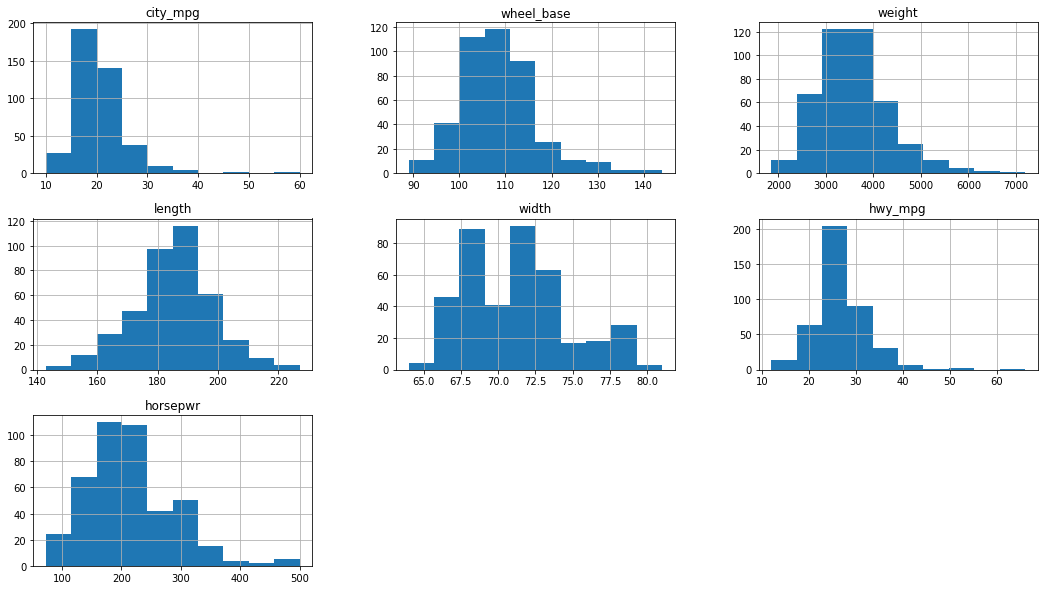

In [11]:
hist = df.hist(figsize = (18, 10), column = ['city_mpg', 'wheel_base',  'weight', 'length', 'width', 'hwy_mpg', 'horsepwr'])

##### По графикам можно предположить, что все показатели, кроме ширины авто обладают нормальным распределением.

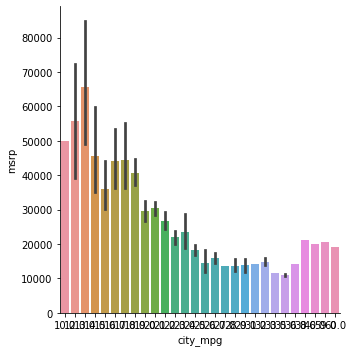

In [12]:
sns.catplot(x = 'city_mpg', y = 'msrp', kind = 'bar', data = df)

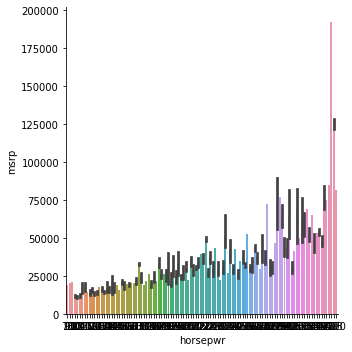

In [13]:
sns.catplot(x = 'horsepwr',y = 'msrp', kind = 'bar', data = df)

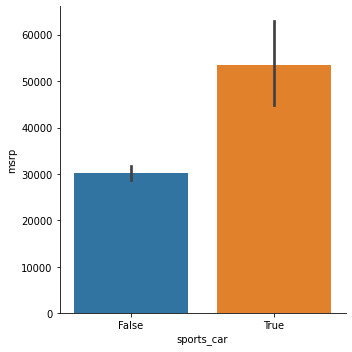

In [14]:
sns.catplot(x = 'sports_car',y = 'msrp',kind = 'bar',data=df)

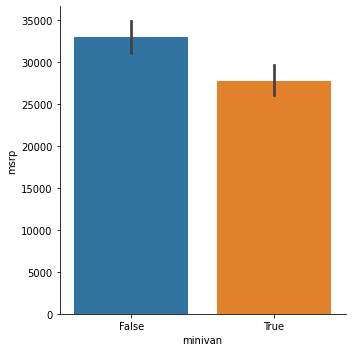

In [15]:
sns.catplot(x = 'minivan',y = 'msrp',kind = 'bar',data=df)

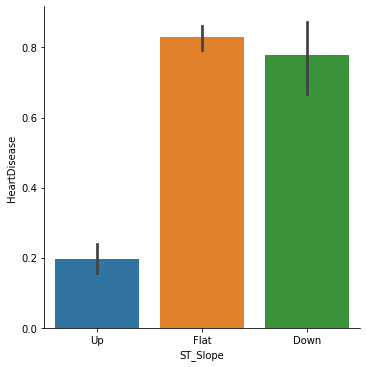

In [ ]:
sns.catplot(x = 'ST_Slope',y = 'HeartDisease',kind = 'bar',data=df)

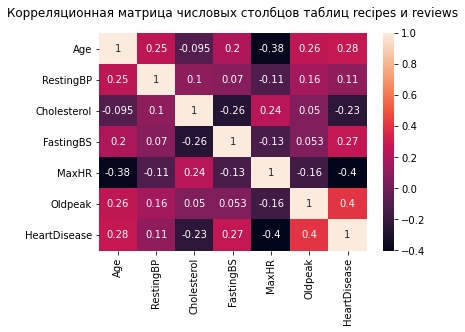

In [ ]:
heat_map = sns.heatmap(df.corr(), annot = True)
plt.title("Корреляционная матрица числовых столбцов таблиц recipes и reviews", pad=16)
plt.show()

##### Выводы:
    - вероятность сердечной недостаточности у мужчин больше, чем у женщин
    
    - зависит от типа боли в груди (ChestPainType)
    
    - от уровня холестерина в крови(Cholestirin)
    
    - от уровня сахара(FastingBS)
    
    - от максимальной частоты сердечных сокращений (MaxHR)
    
    - результаты электрокардиограммы покоя (RestingECG)

#### Провести подготовительную обработку данных, включающую следующие шаги: 
    - удаление или заполнение отсутствующих значений
    
    - приведение всех признаков к бинарной либо числовой шкале 
    
    - удаление несущественных либо избыточных признаков
    
    - другие необходимые действия в зависимости от набора данных и задачи (группировка, удаление аномалий, и др.)

In [ ]:
df = df.drop(['ExerciseAngina','Oldpeak','Age','ST_Slope'], axis = 1)
df

,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,HeartDisease
0,M,ATA,140,289,0,Normal,172,0
1,F,NAP,160,180,0,Normal,156,1
2,M,ATA,130,283,0,ST,98,0
3,F,ASY,138,214,0,Normal,108,1
4,M,NAP,150,195,0,Normal,122,0
...,...,...,...,...,...,...,...,...
913,M,TA,110,264,0,Normal,132,1
914,M,ASY,144,193,1,Normal,141,1
915,M,ASY,130,131,0,Normal,115,1
916,F,ATA,130,236,0,LVH,174,1


In [ ]:
ChestPainType_ = np.unique(df['ChestPainType'].values)
val = [i + 1 for i in range(len(ChestPainType_))]
ChestPainType_1 = dict(zip(ChestPainType_, val))
ChestPainType_1

{'ASY': 1, 'ATA': 2, 'NAP': 3, 'TA': 4}

In [ ]:
restin = np.unique(df['RestingECG'].values)
val = [i + 1 for i in range(len(restin))]
re_ = dict(zip(restin, val))
re_

{'LVH': 1, 'Normal': 2, 'ST': 3}

In [ ]:
sx = np.unique(df['Sex'].values)
val = [i + 1 for i in range(len(sx))]
sx_ = dict(zip(sx, val))
sx_

{'F': 1, 'M': 2}

In [ ]:
pd.options.mode.chained_assignment = None
for i in range(len(df)):
    a = df['ChestPainType'][i]
    df['ChestPainType'][i] = ChestPainType_1[a]
    b = df['RestingECG'][i]
    df['RestingECG'][i] = re_[b]
    c = df['Sex'][i]
    df['Sex'][i] = sx_[c]

In [ ]:
df

,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,HeartDisease
0,2,2,140,289,0,2,172,0
1,1,3,160,180,0,2,156,1
2,2,2,130,283,0,3,98,0
3,1,1,138,214,0,2,108,1
4,2,3,150,195,0,2,122,0
...,...,...,...,...,...,...,...,...
913,2,4,110,264,0,2,132,1
914,2,1,144,193,1,2,141,1
915,2,1,130,131,0,2,115,1
916,1,2,130,236,0,1,174,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sex            918 non-null    object
 1   ChestPainType  918 non-null    object
 2   RestingBP      918 non-null    int64 
 3   Cholesterol    918 non-null    int64 
 4   FastingBS      918 non-null    int64 
 5   RestingECG     918 non-null    object
 6   MaxHR          918 non-null    int64 
 7   HeartDisease   918 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 57.5+ KB


### Дополнительные задания
1) Использовать несколько моделей машинного обучения для решения поставленной задачи.

2) Использовать методику замеры времени обучения каждой использованной модели.

3) Сформировать сводную таблицу результатов обучения, включающую следующие данные:
    
    - время обучения модели;
    
    - accuracy;
    
    - precision;
    
    - recall;
    
    - f1-score.

In [ ]:
Y = df['HeartDisease'].to_numpy()
X = df[['Sex', 'ChestPainType', 'RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR']].to_numpy()

In [ ]:
report = pd.DataFrame(columns = ['Модель', 'Time', 'accuracy', 'precision', 'recall', 'f1'])
report

,Модель,Time,accuracy,precision,recall,f1


In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 0)

#Обучаем модели

In [ ]:
learning_models = {
    "LogisticRegression": LogisticRegression(),
    "Метод опорных векторов с линейным ядром (SVC)": svm.SVC(kernel = 'linear'),
    "Метод опорных векторов с гауссовым ядром (SVC)": svm.SVC(kernel = 'rbf'),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors = 100),
    "Многослойный перцептрон (MLP)": MLPClassifier(max_iter = 200),
}

y_test_predict = dict()
i = 0
for name, model in learning_models.items():
    start_time = time.time()
    model.fit(x_train, y_train)
    compl_time = time.time() - start_time
    print(f"{(compl_time)} seconds время обучения модели {name}")              
    y_test_predict[name] = model.predict(x_test)
    y_train_predict = model.predict(x_train)
    df_differences.loc[i] = [name,
                            compl_time
                            accuracy_score(y_train, y_train_predict),
                            precision_score(y_train, y_train_predict, average = 'macro'),
                            recall_score(y_train, y_train_predict, average = 'macro'),
                            f1_score(y_train, y_train_predict, average = 'macro')]
    i += 1                